In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [5]:
train= pd.read_csv('titanic_train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

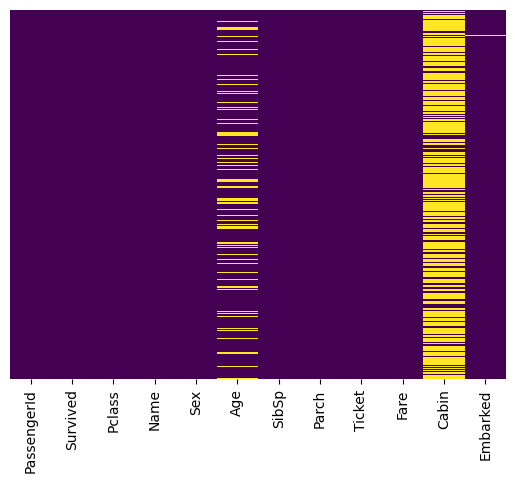

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar= False,cmap= 'viridis')

<Axes: xlabel='Survived', ylabel='count'>

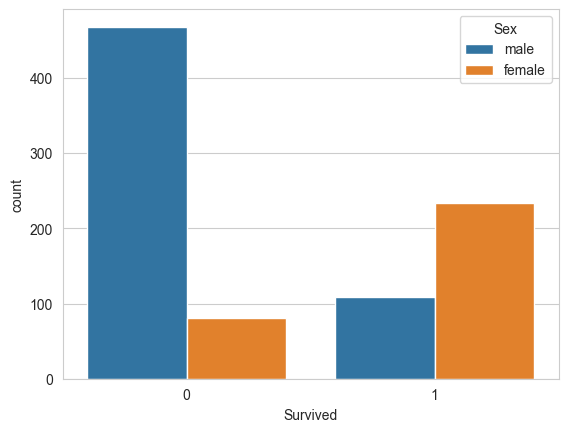

In [8]:
sns.countplot(x='Survived',hue='Sex',data= train)

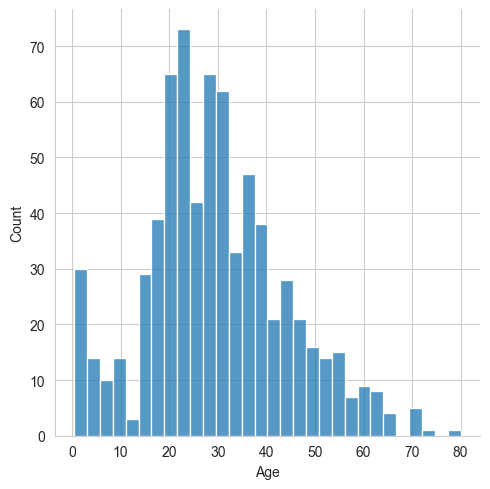

In [10]:
sns.displot(train['Age'].dropna(),bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

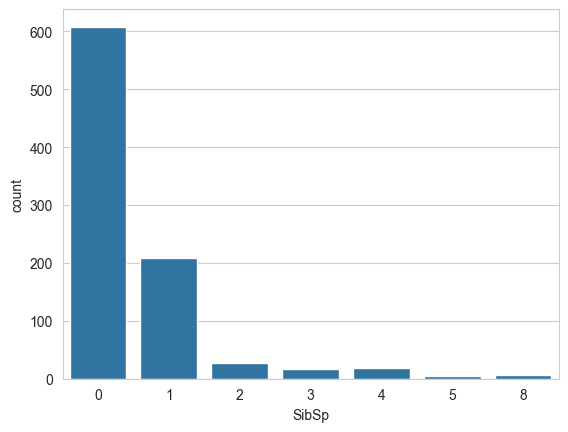

In [11]:
sns.countplot(x='SibSp',data=train)

(array([ 17., 320., 129.,  53.,  43., 104.,  31.,  19.,   4.,  12.,  23.,
         16.,   6.,  12.,  10.,  19.,  10.,   8.,   2.,   0.,   2.,   6.,
          3.,   4.,   0.,   0.,   7.,   0.,   2.,   7.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   1.,
          4.,   0.,   0.,   0.,   2.,   0.,   0.,   6.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([  0.      ,   5.123292,  10.246584,  15.369876,  20.493168,
         25.61646 ,  30.739752,  35.863044,  40.986336,  46.109628,
         51.23292 ,  56.356212,  61.479504,  66.602796,  71.726088,
         76.84938 ,  81.972672,  87.095964,  92.219256,  97.342548,
        102.46584 , 107.589132, 112.712424, 11

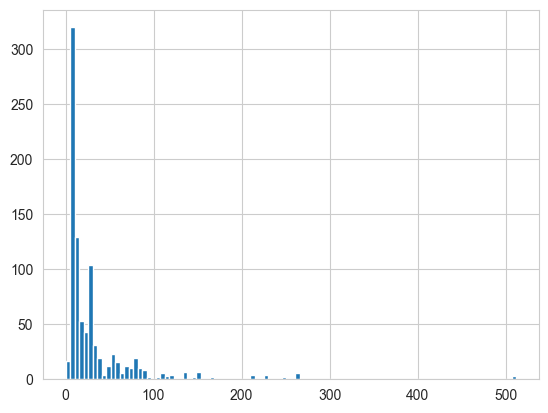

In [14]:
plt.hist(train['Fare'],bins=100)

<Axes: xlabel='Pclass', ylabel='Age'>

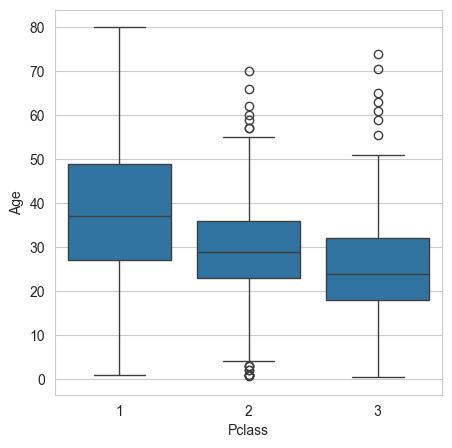

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Pclass',y='Age',data=train)


In [35]:
def impute_age(cols):
    age=cols['Age']
    pclass= cols['Pclass']
    
    if pd.isnull(age):
        if pclass==1: 
           return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [36]:
train['Age']= train.apply(impute_age,axis=1)

<Axes: >

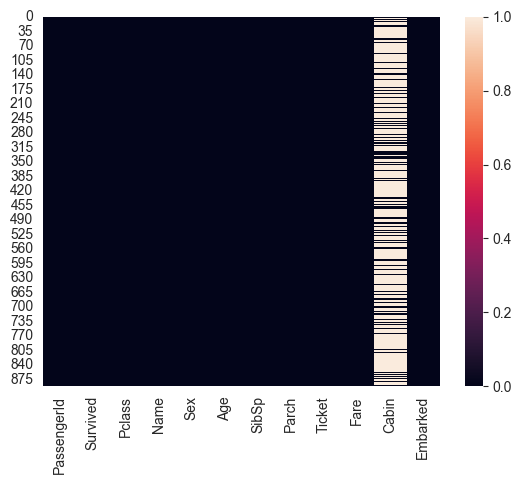

In [37]:
sns.heatmap(train.isnull())

In [40]:
train.drop('Cabin',axis=1,inplace=True)


KeyError: "['Cabin'] not found in axis"

In [41]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

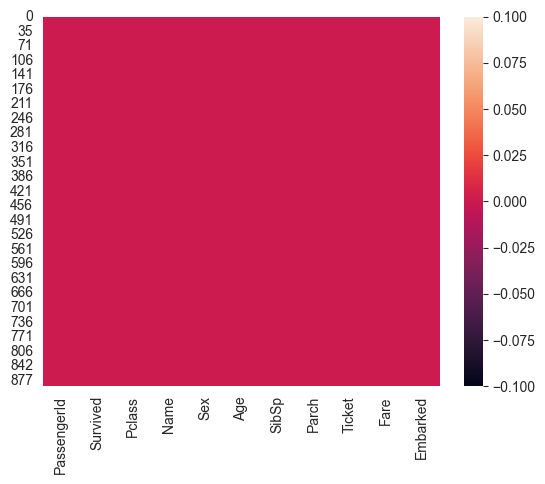

In [43]:
train.dropna(inplace=True)
sns.heatmap(train.isnull())

In [44]:
sex= pd.get_dummies(train['Sex'],drop_first=True)
embark= pd.get_dummies(train['Embarked'],drop_first=True)

In [46]:
train= pd.concat([train,sex,embark],axis=1)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


KeyError: "['Sex' 'Embarked' 'Name' 'Ticket'] not found in axis"

In [47]:
train.drop(['PassengerId'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True,True,False,True


In [48]:
y= train['Survived']
x= train.drop('Survived',axis=1)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [52]:
lg= LogisticRegression()
lg.fit(x_train,y_train)
predictions=lg.predict(x_test)

C:\Users\vaibh\Downloads\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.73      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[139  28]
 [ 25  75]]
